# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [1]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

X, y = mnist['data'], mnist['target']

### Now take a look at the shapes of the X and y matricies 


In [3]:
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [5]:
X[36000]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [6]:
y[36000]

'9'

### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

In [7]:
import matplotlib.pyplot as plt

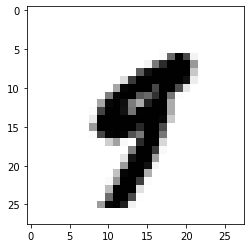

In [8]:
plt.imshow(X = X[36000].reshape(28,28), cmap = 'binary', interpolation='nearest')

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

**Answer: Yes, it matches!! I did it above.**

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [9]:
X_train = X[:60000]

In [10]:
X_test = X[60000:]

In [11]:
y_train = y[:60000]

In [12]:
y_test = y[60000:]


### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [13]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [14]:
from sklearn.linear_model import LogisticRegression

In [ ]:
%%time

model = LogisticRegression(max_iter = 2000)
model.fit(X_train, y_train_5)

### Does the classifier predict correctly the 36000th digit we picked before?

In [18]:
model.predict(X[[36000]])

array([False])

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [19]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [20]:
never_5_clf.fit(X_train, y_train_5)

### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [24]:
import pandas as pd

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
y_pred_never5 = never_5_clf.predict(X_test)

In [27]:
pd.DataFrame(confusion_matrix(y_test_5, y_pred_never5))

,0,1
0,9108,0
1,892,0


In [28]:
y_pred_5 = model.predict(X_test)

In [29]:
pd.DataFrame(confusion_matrix(y_test_5, y_pred_5))

,0,1
0,9030,78
1,146,746


### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

In [31]:
from sklearn.metrics import roc_curve

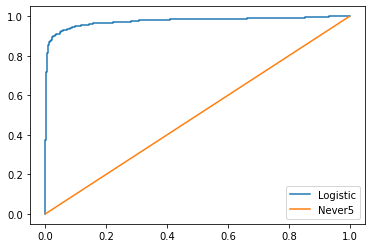

In [32]:
fpr, tpr, thresholds = roc_curve(y_test_5, model.predict_proba(X_test)[:, 1], )
fpr_never5, tpr_never5, thresholds_never5 = roc_curve(y_test_5, never_5_clf.predict(X_test))

plt.plot(fpr, tpr, label='Logistic')
plt.plot(fpr_never5, tpr_never5, label='Never5')
plt.legend()

### Now find the roc_auc_score for each. 

In [33]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test_5, model.predict_proba(X_test)[:,1])

0.9747655685338471

In [34]:
roc_auc_score(y_test_5, never_5_clf.predict(X_test))

0.5

### Using the yellowbrick library  plot the roc_auc_score curve for the logistic model . 

In [35]:
from yellowbrick.classifier import ROCAUC

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


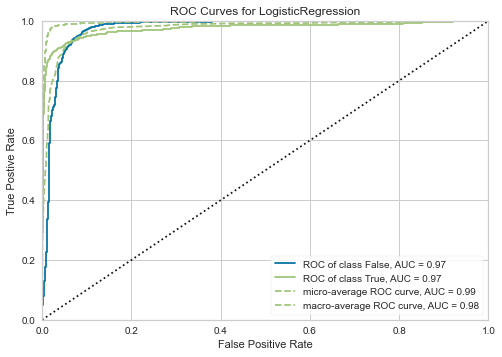

In [37]:
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train_5)
visualizer.score(X_test, y_test_5)
visualizer.show()